## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

In [256]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import datetime as dt
import calendar

In [10]:
os.getcwd()
os.chdir('/mnt/d/lighthouse/lighthouse_data_notes/Week_3/Day_2')
os.getcwd()

'/mnt/d/lighthouse/lighthouse_data_notes/Week_3/Day_2'

In [114]:
data = pd.read_csv('results.csv', header = 0)

In [115]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [119]:
data['date'] = pd.to_datetime(data['date'])

In [175]:
home = data[['date','home_team','home_score','year']]
away = data[['date','away_team','away_score','year']]
home.columns =['date','team','score','year']
away.columns =['date','team','score','year']
all_teams = pd.concat([home,away])
all_teams

,date,team,score,year
0,1872-11-30,Scotland,0,1872
1,1873-03-08,England,4,1873
2,1874-03-07,Scotland,2,1874
3,1875-03-06,England,2,1875
4,1876-03-04,Scotland,3,1876
...,...,...,...,...
41581,2020-01-10,Canada,4,2020
41582,2020-01-12,Sweden,1,2020
41583,2020-01-15,Iceland,1,2020
41584,2020-01-19,Iceland,1,2020


> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [81]:
# Fifa games
fifa_world = data[data['tournament']=='FIFA World Cup']
fifa_world['date'] = pd.to_datetime(fifa_world['date'])
fifa_world['year'] = fifa_world['date'].dt.year

# All teams
home = fifa_world[['date','home_team','home_score','year']]
away = fifa_world[['date','away_team','away_score','year']]
home.columns =['date','team','score','year']
away.columns =['date','team','score','year']
teams = pd.concat([home,away])
teams = teams.groupby('team').sum()

<ipython-input-81-030826ad99c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_world['date'] = pd.to_datetime(fifa_world['date'])
<ipython-input-81-030826ad99c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_world['year'] = fifa_world['date'].dt.year


In [171]:
#test = fifa_world[fifa_world['year']==1930]
#home = test[['date','home_team','home_score','year']]
#away = test[['date','away_team','away_score','year']]
#home.columns =['date','team','score','year']
#away.columns =['date','team','score','year']
#teams = pd.concat([home,away])
#teams = teams.groupby('team').sum()
teams = teams.sort_values(by ='score', ascending = False)
teams

,score,year
team,,
Brazil,229,215974
Germany,226,216178
Argentina,137,160862
Italy,128,164374
France,120,131124
...,...,...
Canada,0,5958
Trinidad and Tobago,0,6018
China PR,0,6006


Text(0, 0.5, 'goals')

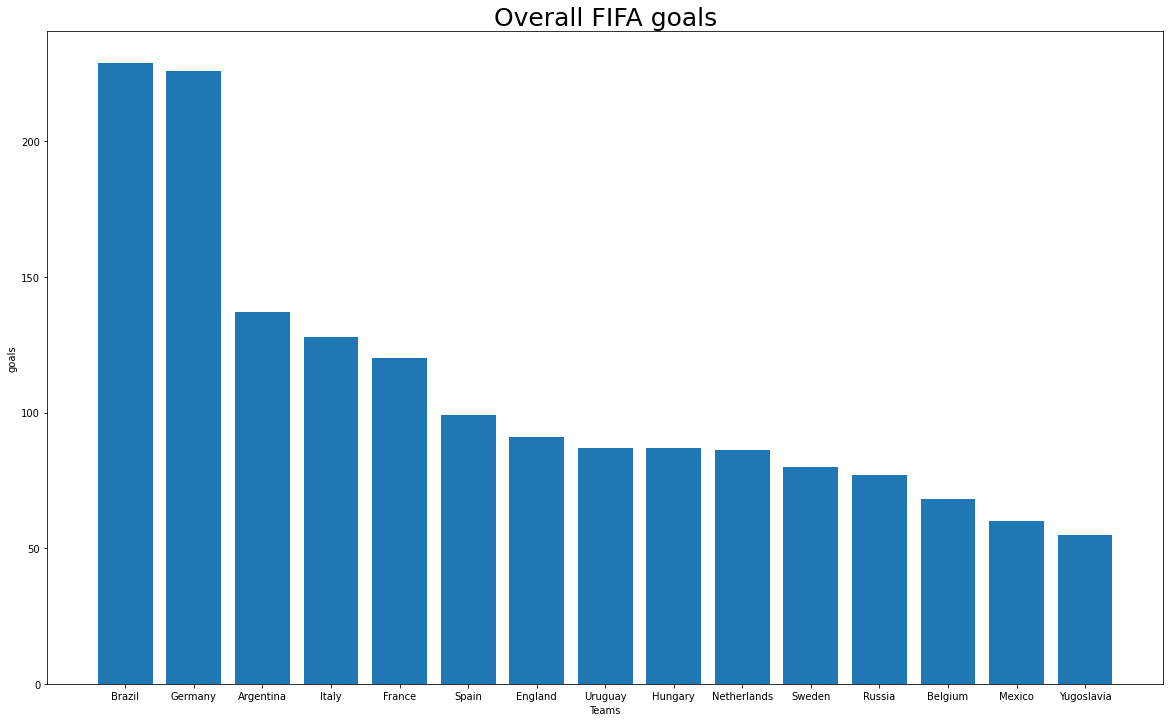

In [102]:
fig, ax = plt.subplots(figsize=(20,12))
ax.bar(teams.head(15).index,teams.head(15).score)
ax.set_title('Overall FIFA goals', size= 25)
ax.set_xlabel('Teams')
ax.set_ylabel('goals')

## Task
What is the number of matches played in each tournament throughout history?

In [107]:
matches = data.groupby('tournament').count()
matches = matches.sort_values(by ='date', ascending = False)
matches.head()

,date,home_team,away_team,home_score,away_score,city,country,neutral
tournament,,,,,,,,
Friendly,17029,17029,17029,17029,17029,17029,17029,17029
FIFA World Cup qualification,7236,7236,7236,7236,7236,7236,7236,7236
UEFA Euro qualification,2582,2582,2582,2582,2582,2582,2582,2582
African Cup of Nations qualification,1672,1672,1672,1672,1672,1672,1672,1672
FIFA World Cup,900,900,900,900,900,900,900,900


In [359]:
matches.head(5).index

Index(['Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification',
       'African Cup of Nations qualification', 'FIFA World Cup'],
      dtype='object', name='tournament')

Text(0, 0.5, 'games')

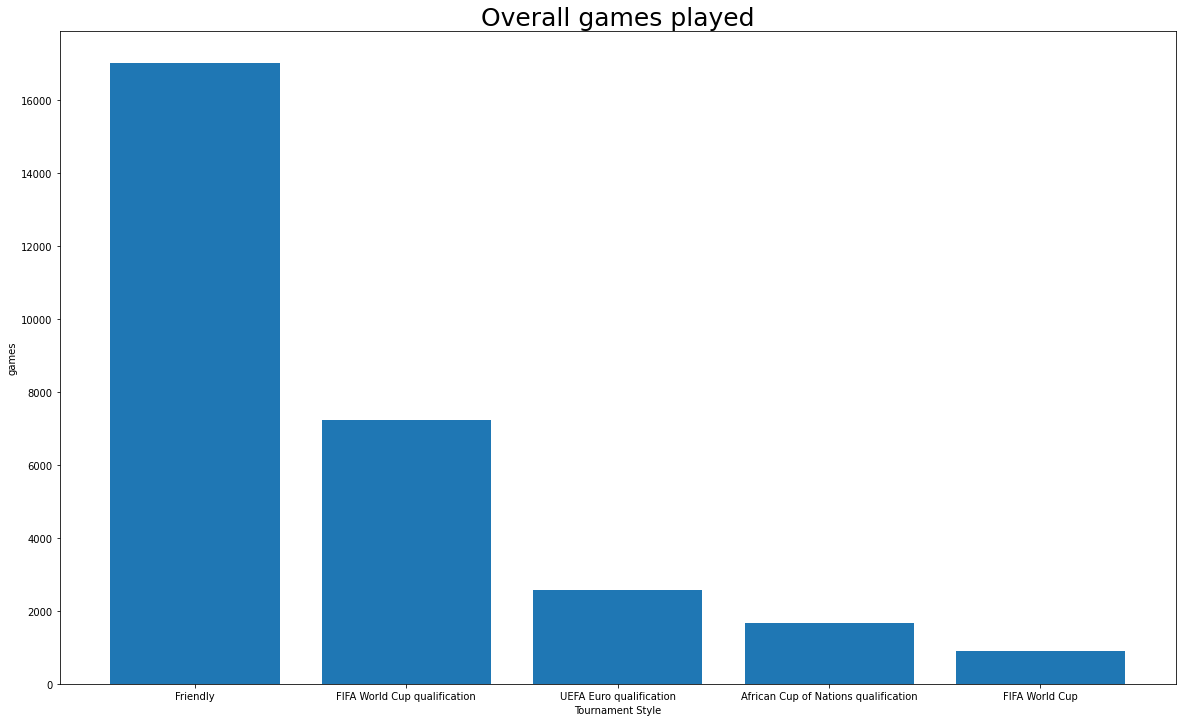

In [111]:
fig, ax = plt.subplots(figsize=(20,12))
ax.bar(matches.head(5).index, matches.head(5).date)
ax.set_title('Overall games played', size= 25)
ax.set_xlabel('Tournament Style')
ax.set_ylabel('games')

## Task 
Show the trend in number of matches per year.

In [132]:
by_year = data
by_year['year'] = by_year['date'].dt.year
by_year = by_year.groupby(by='year').count()
by_year.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
year,,,,,,,,,
1872,1,1,1,1,1,1,1,1,1
1873,1,1,1,1,1,1,1,1,1
1874,1,1,1,1,1,1,1,1,1
1875,1,1,1,1,1,1,1,1,1
1876,2,2,2,2,2,2,2,2,2


In [131]:
by_year.index

Int64Index([2019, 2008, 2011, 2004, 2000, 2001, 2012, 2015, 2007, 2013,
            ...
            1881, 1880, 1879, 1878, 1877, 1876, 1874, 1873, 1875, 1872],
           dtype='int64', name='year', length=149)

[Text(1880, 0, '1880'),
 Text(1885, 0, '1885'),
 Text(1890, 0, '1890'),
 Text(1895, 0, '1895'),
 Text(1900, 0, '1900'),
 Text(1905, 0, '1905'),
 Text(1910, 0, '1910'),
 Text(1915, 0, '1915'),
 Text(1920, 0, '1920'),
 Text(1925, 0, '1925'),
 Text(1930, 0, '1930'),
 Text(1935, 0, '1935'),
 Text(1940, 0, '1940'),
 Text(1945, 0, '1945'),
 Text(1950, 0, '1950'),
 Text(1955, 0, '1955'),
 Text(1960, 0, '1960'),
 Text(1965, 0, '1965'),
 Text(1970, 0, '1970'),
 Text(1975, 0, '1975'),
 Text(1980, 0, '1980'),
 Text(1985, 0, '1985'),
 Text(1990, 0, '1990'),
 Text(1995, 0, '1995'),
 Text(2000, 0, '2000'),
 Text(2005, 0, '2005'),
 Text(2010, 0, '2010'),
 Text(2015, 0, '2015')]

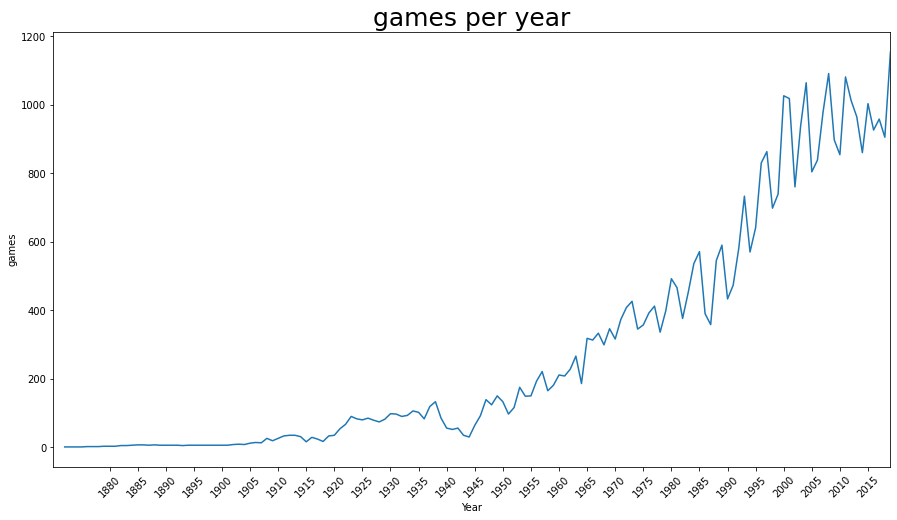

In [148]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(by_year.index, by_year['date'])
ax.set_title('games per year', size= 25)
ax.set_xlabel('Year')
ax.set_ylabel('games')

ax.set_xlim([1870, 2019])
xticklabels = np.arange(1880, 2020, 5) 
ax.xaxis.set_ticks(xticklabels)
ax.set_xticklabels(xticklabels, fontsize=10, rotation=45)

## Task
Which teams are the most successful ones? (winning percentage)

In [214]:
winnings = data.iloc[:,:5]
winnings['year'] = data['year']
winnings['winning_team'] = ""
winnings['winning_team'].loc[winnings['home_score'] > winnings['away_score']] = winnings['home_team']
winnings['winning_team'].loc[winnings['home_score'] < winnings['away_score']] = winnings['away_team']
winnings['winning_team'].loc[winnings['home_score'] == winnings['away_score']] = 'tie'

In [215]:
alls = all_teams.groupby(by='team').count()

In [216]:
winnings = winnings.drop(['date','year'], axis = 1)
winnings = winnings.groupby('winning_team').count()
winnings

,home_team,away_team,home_score,away_score
winning_team,,,,
Abkhazia,12,12,12,12
Afghanistan,30,30,30,30
Albania,84,84,84,84
Alderney,3,3,3,3
Algeria,214,214,214,214
...,...,...,...,...
Zambia,328,328,328,328
Zanzibar,41,41,41,41
Zimbabwe,189,189,189,189


In [217]:
result = alls.join(winnings, lsuffix=alls.index, rsuffix=winnings.index)

In [218]:
result = result.dropna()

In [230]:
result['win_percent'] = result['home_score']/result['date']
result = result.sort_values(by='win_percent', ascending = False)
result['total'] = result['date']
result['lost'] = result['date'] - result['away_team']
result['won'] = result['away_team']
res = result[['total','won','lost','win_percent']]
res

,total,won,lost,win_percent
team,,,,
Surrey,1,1.0,0.0,1.000000
Asturias,1,1.0,0.0,1.000000
Canary Islands,4,3.0,1.0,0.750000
Yorkshire,7,5.0,2.0,0.714286
Padania,43,29.0,14.0,0.674419
...,...,...,...,...
Liechtenstein,198,15.0,183.0,0.075758
Anguilla,61,3.0,58.0,0.049180
Djibouti,88,4.0,84.0,0.045455


Text(0, 0.5, 'games played')

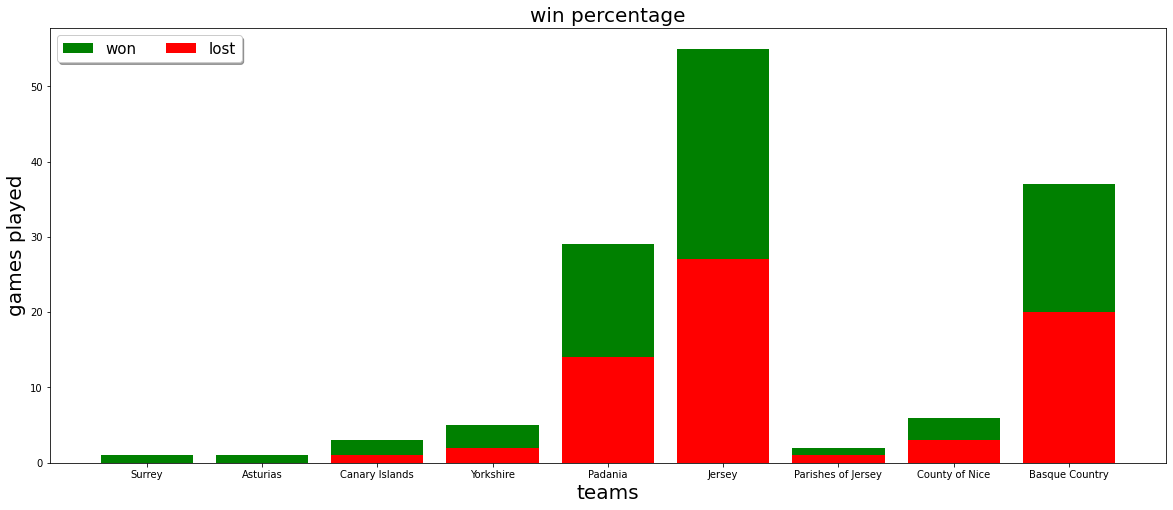

In [245]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(res.head(9).index, res['won'].head(9), color = 'green', label = 'won')
ax.bar(res.head(9).index, res['lost'].head(9), color = 'red', label = 'lost')

leg = ax.legend(loc=2, ncol=2, numpoints=1, fontsize=15, shadow=True)

ax.set_title('win percentage', size= 20)
ax.set_xlabel('teams',fontsize=20)
ax.set_ylabel('games played',fontsize=20)

## Task
Which teams are the least successful ones? (winning percentage)

Text(0, 0.5, 'games played')

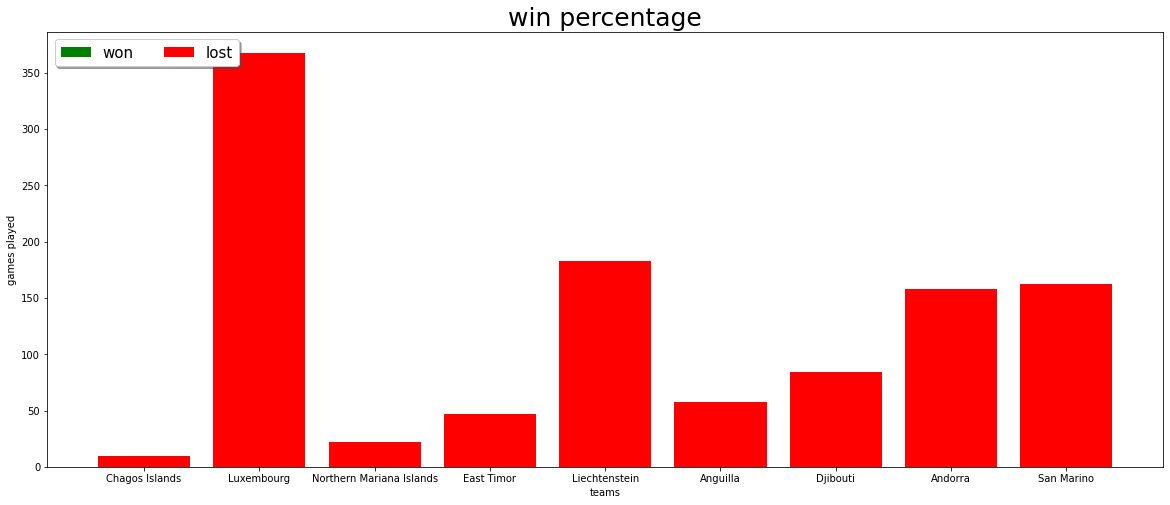

In [241]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(res.tail(9).index, res['won'].tail(9), color = 'green', label = 'won')
ax.bar(res.tail(9).index, res['lost'].tail(9), color = 'red', label = 'lost')

leg = ax.legend(loc=2, ncol=2, numpoints=1, fontsize=15, shadow=True)

ax.set_title('win percentage', size= 25)
ax.set_xlabel('teams')
ax.set_ylabel('games played')

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [283]:
months = data
months['month'] = data['date'].dt.month
months = months.groupby('month').count()
months = months.rename(index = lambda x: calendar.month_abbr[x])
months

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
month,,,,,,,,,,
Jan,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218
Feb,2564,2564,2564,2564,2564,2564,2564,2564,2564,2564
Mar,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039
Apr,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538
May,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231
Jun,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969
Jul,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770
Aug,2752,2752,2752,2752,2752,2752,2752,2752,2752,2752
Sep,4296,4296,4296,4296,4296,4296,4296,4296,4296,4296


Text(0, 0.5, 'games')

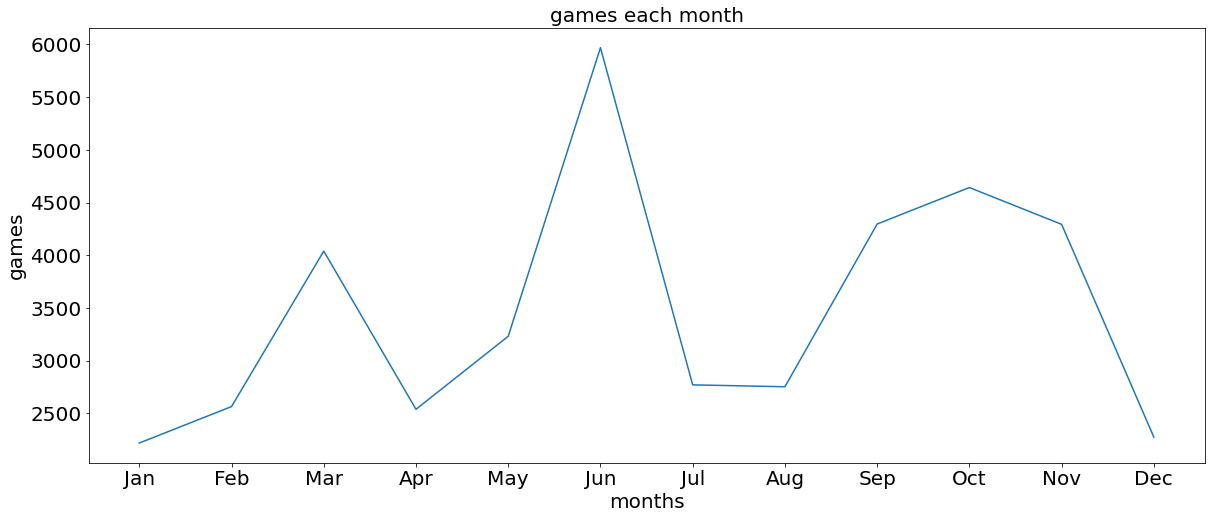

In [284]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(months.index, months['date'])

ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_title('games each month', size = 20)
ax.set_xlabel('months', size = 20)
ax.set_ylabel('games', size = 20)

## Task
Which teams played against each other the most?

In [344]:
faced = data
faced = faced.groupby(['home_team','away_team']).count()
faced.sort_values('date', ascending = False).sort_index()
#faced.groupby(level=0).head(1)
#df.groupby(level=0).head(1)
faced

date  home_score  away_score  tournament  city  \
home_team     away_team                                                         
Abkhazia      Artsakh             1           1           1           1     1   
              Chagos Islands      1           1           1           1     1   
              Chameria            2           2           2           2     2   
              Kárpátalja          1           1           1           1     1   
              Northern Cyprus     2           2           2           2     2   
...                             ...         ...         ...         ...   ...   
Åland Islands Jersey              2           2           2           2     2   
              Menorca             2           2           2           2     2   
              Saare County        2           2           2           2     2   
              Shetland            4           4           4           4     4   
              Ynys Môn            2           2           2           2     2   

                               country  neutral  year  month  
home_team     away_team                                       
Abkhazia      Artsakh                1        1     1      1  
              Chagos Islands         1        1     1      1  
              Chameria               2        2     2      2  
              Kárpátalja             1        1     1      1  
              Northern Cyprus        2        2     2      2  
...                                ...      ...   ...    ...  
Åland Islands Jersey                 2        2     2      2  
              Menorca                2        2     2      2  
              Saare County           2        2     2      2  
              Shetland               4        4     4      4  
              Ynys Môn               2        2     2      2  

[10976 rows x 9 columns]

In [ ]:
faced = faced.sort_values('date', ascending = False)

## Task
Apply your creativity to show some additional insights from the data.

In [350]:
home_score = data['home_score']
away_score = data['away_score']

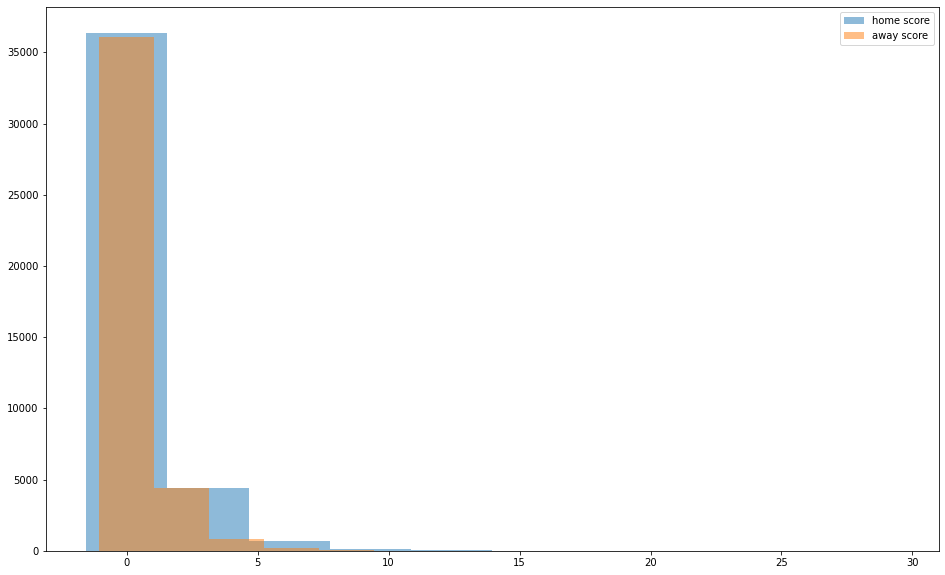

In [358]:
fig, ax = plt.subplots(figsize=(16,10))
ax.hist(home_score, bins = 10, label = 'home score',align='left', alpha = 0.5)
ax.hist(away_score, bins = 10, label = 'away score',align='left', alpha = 0.5)
plt.legend(loc='upper right')

## Task (Stretch)
Create these graphs in Tableau as well.